This notebook contains example use cases of the pyEasyTrend package.

In [1]:
import pyeasytrend
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"This tutorial employes the version " + pyeasytrend.__version__ + " of pyEasyTrend"

'This tutorial employes the version 0.0.0.6 of pyEasyTrend'

## Example 1: Score by Learning Time
In this example, we simulate a typical observational study that verify the relationship between the time a student spent studying a topic and his/her score in a final test.
Students (N = 100) are given up to 1 hour to study a topic, and they are then tested and graded with a score that goes from 0 to 100. Students can dedicate as much time they want to study, up to the time limit (60 minutes).

*Question: What is the best model to describe the relationship between the time spent studying and the score obtain in a test*

In [3]:
data = {'StudyTime':[24, 44, 21, 45, 54, 26, 57, 34, 33, 12, 17, 21, 58, 41, 29, 55, 42, 40, 21, 9, 39, 30, 17, 31, 51, 42, 30, 3, 20, 21, 4, 16, 26, 6, 18, 50, 60, 13, 23, 13, 3, 35, 38, 51, 12, 35, 7, 42, 20, 41, 37, 56, 19, 57, 12, 49, 15, 6, 43, 7, 40, 12, 35, 4, 46, 29, 6, 38, 36, 33, 21, 33, 50, 54, 25, 38, 48, 17, 28, 48, 16, 50, 24, 15, 40, 54, 40, 42, 2, 20, 24, 21, 37, 15, 52, 36, 5, 7, 29, 21],
        'Score':[18, 47, 21, 60, 80, 18, 100, 28, 41, 7, 12, 17, 82, 45, 33, 94, 41, 55, 9, 6, 53, 24, 13, 35, 62, 43, 33, 2, 17, 10, 0, 7, 14, 0, 14, 72, 94, 7, 14, 3, 0, 43, 39, 80, 5, 39, 4, 43, 14, 37, 39, 80, 16, 94, 7, 55, 13, 2, 45, 6, 55, 7, 35, 0, 69, 18, 0, 45, 43, 27, 11, 37, 67, 82, 16, 41, 74, 10, 19, 55, 14, 60, 18, 7, 55, 64, 37, 60, 2, 10, 17, 14, 30, 6, 69, 32, 2, 1, 32, 10]}
df = pd.DataFrame(data)
df.head()

,StudyTime,Score
0,24,18
1,44,47
2,21,21
3,45,60
4,54,80


We can produce a simple visualization of the relationship between time spent studying and score on test

Text(0.5, 1.0, 'Score on test by Study Time')

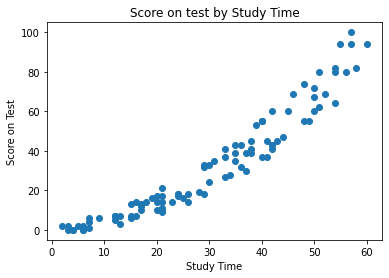

In [4]:
plt.scatter(df.StudyTime, df.Score)
plt.xlabel('Study Time')
plt.ylabel('Score on Test')
plt.title('Score on test by Study Time')

## Perform the Trend Analysis
We want to test models up the the 4th degree y = ax^4 + bx^3 + cx^2 + dx + q

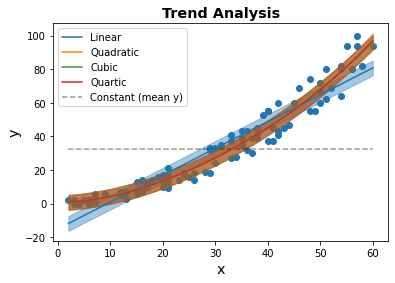

,Order,R2,SSE,F,pvalue,AIC,BIC
0,1,0.907946,6498.522729,966.589949,1.110223e-16,703.203704,705.808874
1,2,0.952677,3340.746815,91.687362,1.110223e-15,638.665654,643.875994
2,3,0.952691,3339.758842,0.028399,8.665290e-01,640.636076,648.451587
3,4,0.952771,3334.111158,0.160921,6.892104e-01,642.466828,652.887509


In [5]:
results = pyeasytrend.analyzeTrend(df.StudyTime, df.Score, maxDegree=4, visualize=True)
pyeasytrend.tablifyResults(results)

From the table above, we can infer that the best model is the Quadratic model (y = ax^2 + bx + q), given that the p value of the model is below the commonly adopted alpha = 0.05 (the model is performing significantly better than a Linear model), while the p-value of the cubic model is above 0.05 (not significantly better than a quadratic model), as also reflected by the R2 score.
Additionally, both the AIC and BIC metrics suggest the adoption of the model of order 2 to explain the data.